<a href="https://colab.research.google.com/github/WoradeeKongthong/DataCamp2020_homework/blob/master/DeepLearningHomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1 : predict คนไข้ว่าเป็นเบาหวานหรือไม่  
data type : structured data  
model : ANN
 

In [69]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt

## Load dataset ของ Pima Indians

In [178]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', 
                 header=None, 
                 names=['num_of_pregnant','plasma_glucose_conc','blood_pressure','triceps_skin_food_thickness','2hrs_insulin','bmi','diab_pedigree_fn','age','diabetes'])
df

,num_of_pregnant,plasma_glucose_conc,blood_pressure,triceps_skin_food_thickness,2hrs_insulin,bmi,diab_pedigree_fn,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Explore the dataset

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   num_of_pregnant              768 non-null    int64  
 1   plasma_glucose_conc          768 non-null    int64  
 2   blood_pressure               768 non-null    int64  
 3   triceps_skin_food_thickness  768 non-null    int64  
 4   2hrs_insulin                 768 non-null    int64  
 5   bmi                          768 non-null    float64
 6   diab_pedigree_fn             768 non-null    float64
 7   age                          768 non-null    int64  
 8   diabetes                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Note : There is no missing value

In [180]:
df.describe()

,num_of_pregnant,plasma_glucose_conc,blood_pressure,triceps_skin_food_thickness,2hrs_insulin,bmi,diab_pedigree_fn,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [181]:
# explore the label 
df['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

## Create train, test dataset

In [79]:
from sklearn.model_selection import train_test_split

In [182]:
# choose X and y
X = df.drop(['diabetes'], axis=1).copy()
y = df['diabetes'].copy()

In [183]:
# create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('X_train shape = ', X_train.shape)
print('y_train shape = ', y_train.shape)
print('X_test shape = ', X_test.shape)
print('y_test shape = ', y_test.shape)

X_train shape =  (614, 8)
y_train shape =  (614,)
X_test shape =  (154, 8)
y_test shape =  (154,)


## The model

In [83]:
from keras.models import Sequential
from keras.layers import Dense

In [184]:
# create the model
model = Sequential()
model.add(Dense(units=16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [185]:
# compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [186]:
# print model summary
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_24 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_25 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 17        
Total params: 1,233
Trainable params: 1,233
Non-trainable params: 0
_________________________________________________________________


In [187]:
# fit the model
history = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.2, verbose=0)

## Plot the learning curve

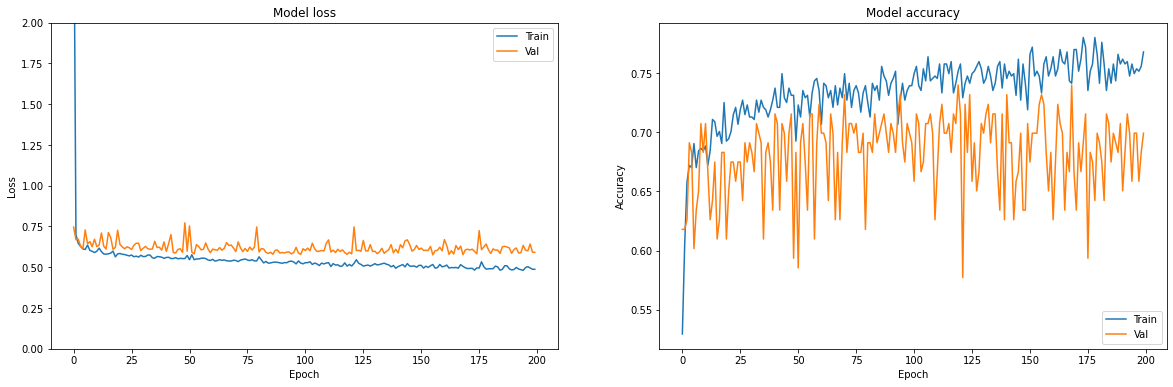

In [188]:
plt.figure(figsize=(20,6))

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim((0,2))

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='lower right')
plt.show()

## Save the model

In [189]:
model.save('diabetes_classifier.h5')

In [122]:
from keras.models import load_model

## Prediction on test set

In [190]:
model = load_model('diabetes_classifier.h5')

In [193]:
y_pred = model.predict(X_test)

In [194]:
result_df = pd.DataFrame()
result_df['y_test'] = y_test
result_df['y_pred'] = y_pred.round()
result_df

,y_test,y_pred
560,1,1.0
689,1,1.0
410,0,0.0
536,0,0.0
150,0,1.0
...,...,...
215,1,1.0
231,1,0.0
452,0,0.0
401,0,0.0


## Model Evaluation

In [191]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.7152 - accuracy: 0.6364


[0.715233325958252, 0.6363636255264282]

In [103]:
from sklearn import metrics

In [195]:
# confusion metrix
cm = metrics.confusion_matrix(y_test, y_pred.round())
cm

array([[61, 37],
       [19, 37]])

# Homework 2 : MNIST dataset  
input type : 28x28 pixels, 1 channel  
model : CNN

## Load the dataset (Train-test datasets)

In [105]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train shape = ', X_train.shape)
print('y_train shape = ', y_train.shape)
print('X_test shape = ', X_test.shape)
print('y_test shape = ', y_test.shape)

X_train shape =  (60000, 28, 28)
y_train shape =  (60000,)
X_test shape =  (10000, 28, 28)
y_test shape =  (10000,)


label =  9


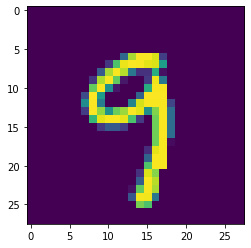

In [109]:
# data example
randnum = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[randnum])
print('label = ', y_train[randnum])

## Data Preparation

In [110]:
# convert the data (X_train and X_test) to be 3D picture with 1 channel 
X_train = np.expand_dims(X_train, 3)
X_test = np.expand_dims(X_test, 3)

print('X_train shape = ', X_train.shape)
print('y_train shape = ', y_train.shape)
print('X_test shape = ', X_test.shape)
print('y_test shape = ', y_test.shape)

X_train shape =  (60000, 28, 28, 1)
y_train shape =  (60000,)
X_test shape =  (10000, 28, 28, 1)
y_test shape =  (10000,)


In [111]:
# convert the label (y_train and y_test) to be categorical 
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print('X_train shape = ', X_train.shape)
print('y_train shape = ', y_train.shape)
print('X_test shape = ', X_test.shape)
print('y_test shape = ', y_test.shape)

X_train shape =  (60000, 28, 28, 1)
y_train shape =  (60000, 10)
X_test shape =  (10000, 28, 28, 1)
y_test shape =  (10000, 10)


In [112]:
# check X_train data type
print(X_train.dtype)
print(X_train.min())
print(X_train.max())

uint8
0
255


In [113]:
# change the data type to float32 and normalize the data
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [114]:
# check X_train data type
print(X_train.dtype)
print(X_train.min())
print(X_train.max())

float32
0.0
1.0


## The model

In [115]:
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD

In [116]:
# create the CNN model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [117]:
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [118]:
# print model summary
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [119]:
# fit the model
history = model.fit(X_train, y_train, epochs=30, batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 23s 30ms/step - loss: 0.3447 - accuracy: 0.8990 - val_loss: 0.1568 - val_accuracy: 0.9545
Epoch 2/30
750/750 [==============================] - 23s 30ms/step - loss: 0.1432 - accuracy: 0.9573 - val_loss: 0.1090 - val_accuracy: 0.9684
Epoch 3/30
750/750 [==============================] - 23s 30ms/step - loss: 0.0980 - accuracy: 0.9699 - val_loss: 0.0960 - val_accuracy: 0.9714
Epoch 4/30
750/750 [==============================] - 23s 30ms/step - loss: 0.0754 - accuracy: 0.9766 - val_loss: 0.0821 - val_accuracy: 0.9752
Epoch 5/30
750/750 [==============================] - 23s 30ms/step - loss: 0.0573 - accuracy: 0.9827 - val_loss: 0.0673 - val_accuracy: 0.9808
Epoch 6/30
750/750 [==============================] - 23s 30ms/step - loss: 0.0459 - accuracy: 0.9862 - val_loss: 0.0630 - val_accuracy: 0.9822
Epoch 7/30
750/750 [==============================] - 24s 32ms/step - loss: 0.0371 - accuracy: 0.9888 - val_loss: 0.0582 - val_accuracy:

## Plot the learning curve

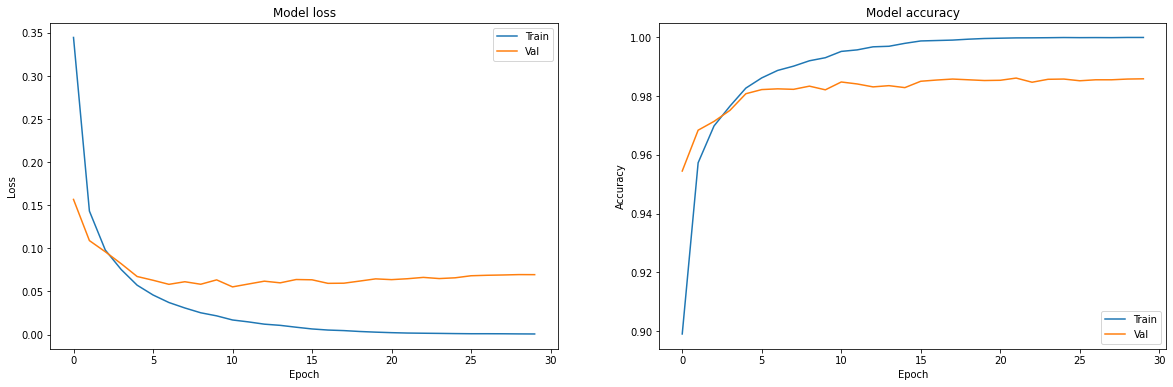

In [120]:
plt.figure(figsize=(20,6))

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
#plt.ylim((0,2))

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='lower right')
plt.show()

## Save the model

In [121]:
model.save('mnist_classifier.h5')

## Model evaluation

In [123]:
# load the saved model
model = load_model('mnist_classifier.h5')

In [125]:
# explore the model
model.get_weights()

[array([[[[-0.13711753,  0.23560114, -0.0165977 ,  0.44876915,
           -0.71041113, -0.01704282,  0.3212862 ,  0.31927076,
            0.43422174,  0.08596599, -0.05367735, -0.13391604,
            0.73363614,  0.33009434, -0.2721905 , -0.51836574,
            0.35015118, -0.43162763,  0.6704617 ,  0.2926449 ,
            0.55474025,  0.02424624, -0.05097394,  0.03785509,
            0.14046083, -0.2756967 ,  0.35496867,  0.2909248 ,
            0.4282401 ,  0.04052971,  0.78031856, -0.08871648]],
 
         [[-0.17090094,  0.414901  , -0.23921506, -0.35857037,
           -0.05158871, -0.1492244 , -0.12423915,  0.00700513,
            0.21074075,  0.6733833 ,  0.31158763,  0.28114772,
           -0.11313049,  0.42320073, -0.3488487 , -0.12428838,
            0.3083562 ,  0.42102054,  1.183154  ,  0.70283794,
            0.55445045,  0.13692865,  0.21730945,  0.0560438 ,
            0.1230134 , -0.7742723 ,  0.48231483,  0.17164424,
            0.55050546,  0.44776213,  1.0527761 ,  

In [126]:
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 2s 7ms/step - loss: 0.0540 - accuracy: 0.9865


[0.0540384016931057, 0.9865000247955322]

## Make prediction on test set

In [151]:
y_pred = model.predict(X_test)

# example output
print('y_pred shape : ', y_pred.shape)
print('example : \n', y_pred[0])

y_pred shape :  (10000, 10)
example : 
 [1.61928000e-14 8.44638855e-12 4.16288358e-12 2.46902886e-07
 1.03566026e-20 5.72187697e-15 1.59468004e-18 9.99999762e-01
 1.21996174e-12 1.76544321e-10]


In [152]:
# convert y_test and y_pred to integer label
label_test = list(map(np.argmax, y_test))
label_pred = list(map(np.argmax, y_pred))

print('first 10 example')
print('label_test : ', label_test[:10])
print('label_pred : ', label_pred[:10])

first 10 example
label_test :  [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
label_pred :  [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


(28, 28, 1)

Prediction :  0


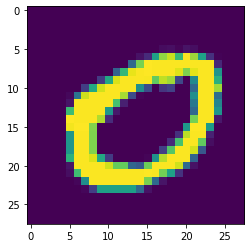

In [177]:
# example of image and prediction
randnum = np.random.randint(0,len(y_test))
plt.imshow(np.reshape(X_test[randnum]*255, (28,28)))
print('Prediction : ', label_pred[randnum])

In [155]:
# Confusion matrix
cm = metrics.confusion_matrix(label_test, label_pred)
cm

array([[ 969,    0,    2,    0,    1,    1,    2,    2,    3,    0],
       [   0, 1129,    2,    1,    0,    0,    1,    0,    2,    0],
       [   3,    2, 1015,    1,    2,    0,    1,    5,    3,    0],
       [   2,    0,    4,  996,    0,    3,    0,    1,    2,    2],
       [   0,    0,    0,    0,  973,    0,    3,    1,    0,    5],
       [   1,    0,    0,    6,    0,  881,    3,    0,    1,    0],
       [   5,    3,    2,    1,    3,    2,  942,    0,    0,    0],
       [   1,    1,    5,    1,    0,    0,    0, 1015,    1,    4],
       [   2,    0,    2,    4,    0,    2,    0,    1,  960,    3],
       [   1,    3,    0,    3,   10,    2,    0,    5,    0,  985]])